# 機械学習サンプルワークフロー

このノートブックは、基本的な機械学習ワークフローのサンプルです。

## 1. ライブラリのインポート

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("ライブラリのインポートが完了しました")

ライブラリのインポートが完了しました


## 2. 分類タスクの例（Irisデータセット）

In [4]:
# データの読み込み
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# DataFrameに変換
iris_df = pd.DataFrame(X_iris, columns=iris.feature_names)
iris_df['target'] = y_iris

print("Irisデータセットの形状:", iris_df.shape)
iris_df.head()

Irisデータセットの形状: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Figure size 1200x800 with 0 Axes>

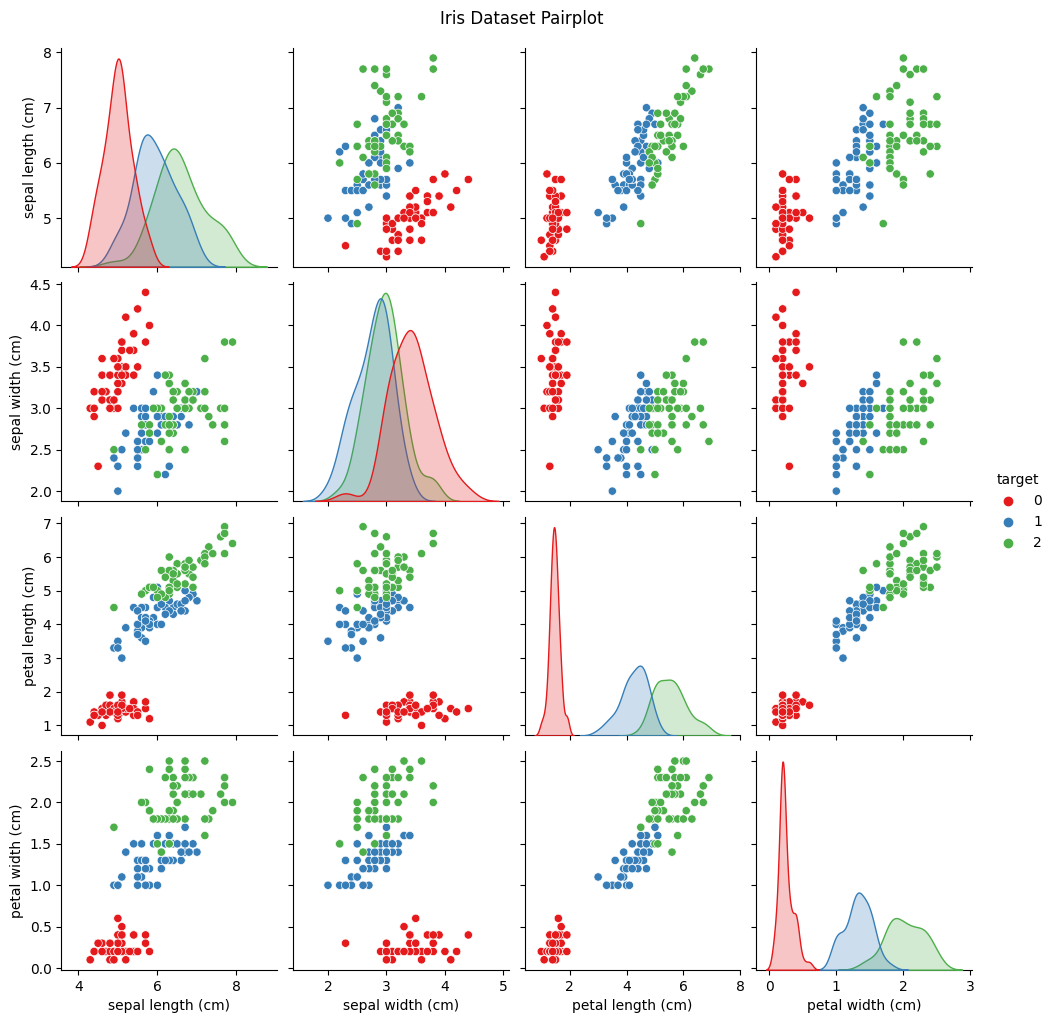

In [5]:
# データの可視化
plt.figure(figsize=(12, 8))
sns.pairplot(iris_df, hue='target', palette='Set1')
plt.suptitle('Iris Dataset Pairplot', y=1.02)
plt.show()

In [6]:
# 訓練・テストデータの分割
X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

# ランダムフォレストモデルの訓練
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 予測
y_pred = rf_classifier.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
print(f"分類精度: {accuracy:.3f}")
print("\n分類レポート:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

分類精度: 0.889

分類レポート:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



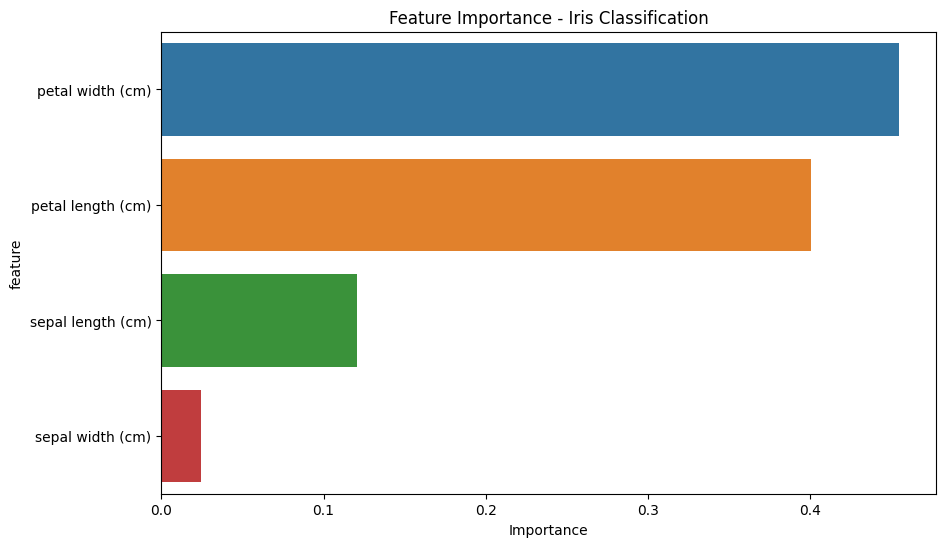

In [7]:
# 特徴量重要度の可視化
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance - Iris Classification')
plt.xlabel('Importance')
plt.show()

## 3. 回帰タスクの例（カリフォルニア住宅データセット）

In [8]:
# カリフォルニア住宅データセットの読み込み
california_housing = fetch_california_housing()
X_housing = california_housing.data
y_housing = california_housing.target

# DataFrameに変換
housing_df = pd.DataFrame(X_housing, columns=california_housing.feature_names)
housing_df['target'] = y_housing

print("カリフォルニア住宅データセットの形状:", housing_df.shape)
print("\n特徴量の説明:")
print(california_housing.DESCR[:500] + "...")
housing_df.head()

カリフォルニア住宅データセットの形状: (20640, 9)

特徴量の説明:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        ...


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


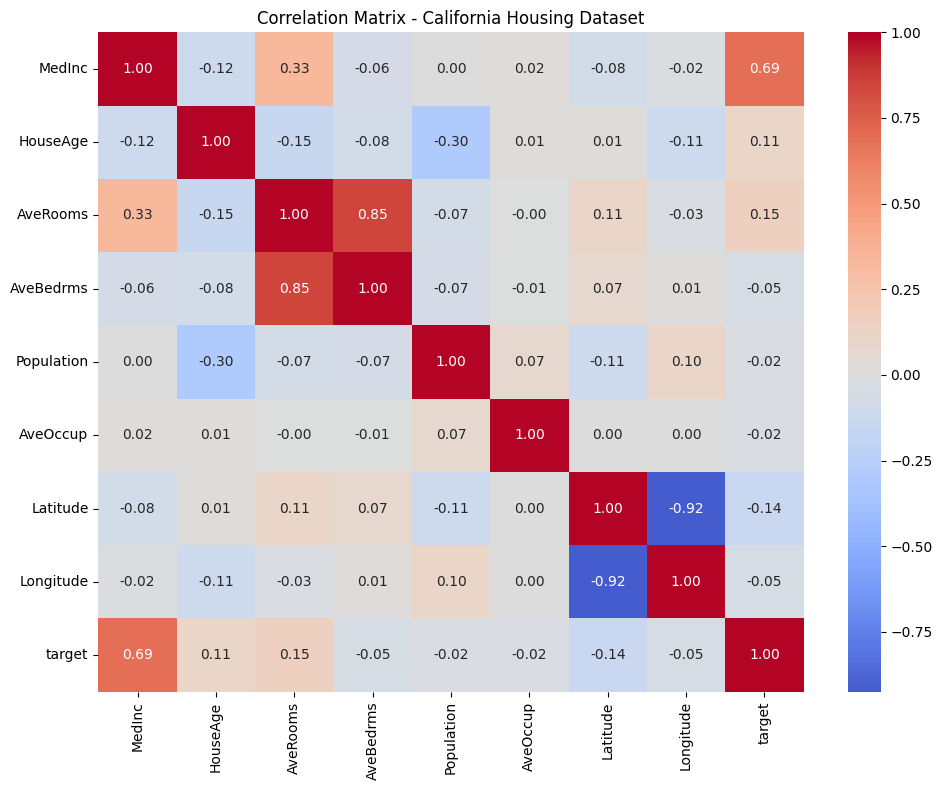

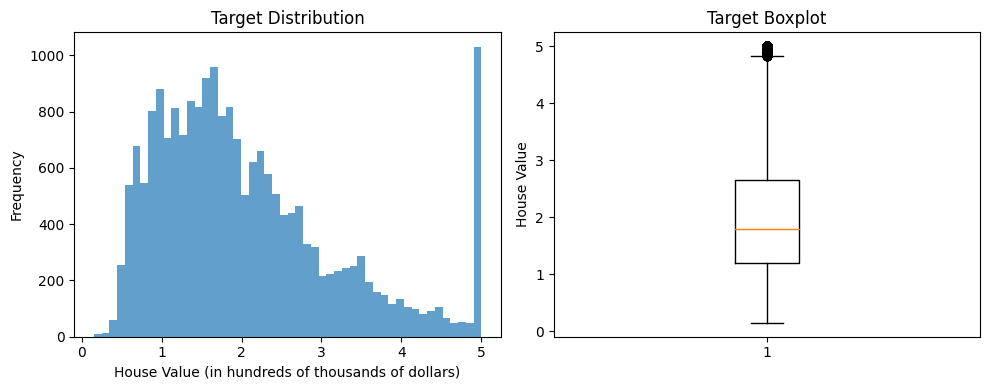

In [9]:
# 相関行列の可視化
plt.figure(figsize=(10, 8))
correlation_matrix = housing_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - California Housing Dataset')
plt.tight_layout()
plt.show()

# ターゲット変数の分布
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y_housing, bins=50, alpha=0.7)
plt.xlabel('House Value (in hundreds of thousands of dollars)')
plt.ylabel('Frequency')
plt.title('Target Distribution')

plt.subplot(1, 2, 2)
plt.boxplot(y_housing)
plt.ylabel('House Value')
plt.title('Target Boxplot')
plt.tight_layout()
plt.show()

In [10]:
# 訓練・テストデータの分割
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_housing, y_housing, test_size=0.3, random_state=42
)

# ランダムフォレスト回帰モデルの訓練
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_housing, y_train_housing)

# 予測
y_pred_housing = rf_regressor.predict(X_test_housing)

# 評価
mse = mean_squared_error(y_test_housing, y_pred_housing)
r2 = r2_score(y_test_housing, y_pred_housing)
rmse = np.sqrt(mse)

print(f"平均二乗誤差 (MSE): {mse:.3f}")
print(f"平方根平均二乗誤差 (RMSE): {rmse:.3f}")
print(f"決定係数 (R²): {r2:.3f}")

# 特徴量重要度
feature_importance_housing = pd.DataFrame({
    'feature': california_housing.feature_names,
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print("\n特徴量重要度:")
print(feature_importance_housing)

平均二乗誤差 (MSE): 0.258
平方根平均二乗誤差 (RMSE): 0.507
決定係数 (R²): 0.804

特徴量重要度:
      feature  importance
0      MedInc    0.526182
5    AveOccup    0.138212
6    Latitude    0.086065
7   Longitude    0.086059
1    HouseAge    0.054705
2    AveRooms    0.047090
4  Population    0.031636
3   AveBedrms    0.030051


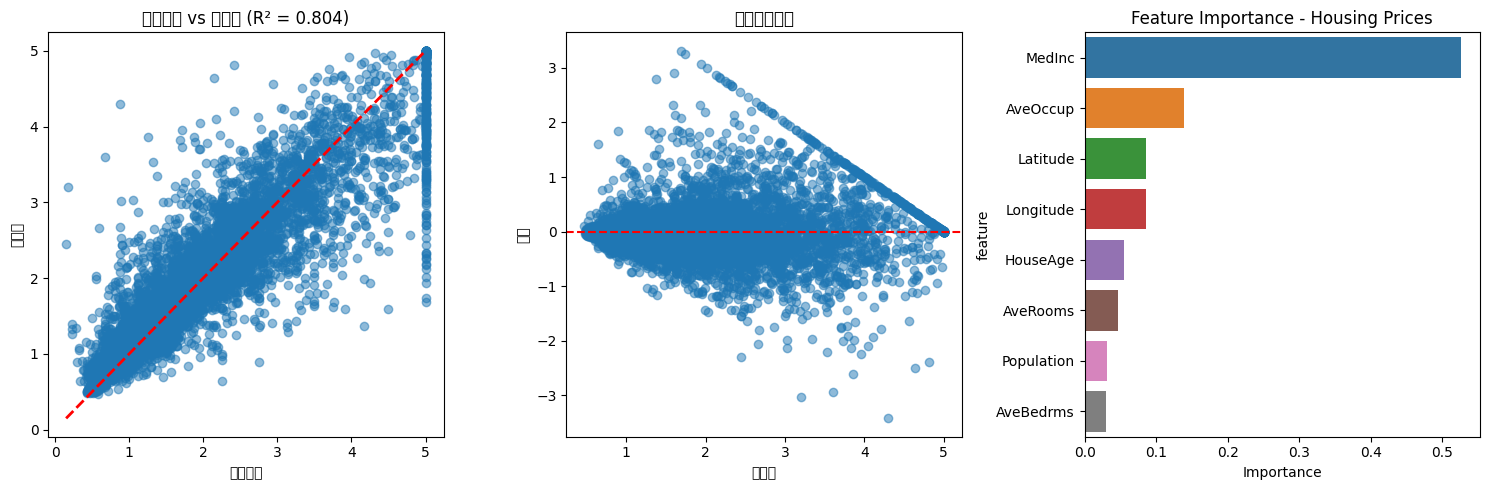

In [11]:
# 予測結果の可視化
plt.figure(figsize=(15, 5))

# 実際の値 vs 予測値
plt.subplot(1, 3, 1)
plt.scatter(y_test_housing, y_pred_housing, alpha=0.5)
plt.plot([y_test_housing.min(), y_test_housing.max()], 
         [y_test_housing.min(), y_test_housing.max()], 'r--', lw=2)
plt.xlabel('実際の値')
plt.ylabel('予測値')
plt.title(f'実際の値 vs 予測値 (R² = {r2:.3f})')

# 残差プロット
plt.subplot(1, 3, 2)
residuals = y_test_housing - y_pred_housing
plt.scatter(y_pred_housing, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('予測値')
plt.ylabel('残差')
plt.title('残差プロット')

# 特徴量重要度の可視化
plt.subplot(1, 3, 3)
sns.barplot(data=feature_importance_housing, x='importance', y='feature')
plt.title('Feature Importance - Housing Prices')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

## 4. まとめ

このノートブックでは以下の内容を実装しました：

1. **分類タスク**:
   - Irisデータセットを使用
   - ランダムフォレスト分類器で学習
   - 精度評価と特徴量重要度の可視化

2. **回帰タスク**:
   - カリフォルニア住宅データセットを使用
   - ランダムフォレスト回帰器で学習
   - MSE、RMSE、R²による評価
   - 残差分析と特徴量重要度の可視化

**学習ポイント**:
- データセットの探索的データ分析（EDA）
- 適切な評価指標の選択
- 可視化による結果の解釈
- 特徴量重要度による予測の説明可能性

このワークフローを参考に、独自のデータセットでの機械学習に取り組んでみてください！